# 🌍 **Air Quality Analysis and Prediction Project** 🌟

## 📜 **Project Overview**
This project focuses on analyzing air quality data, visualizing patterns, and predicting pollutant levels using machine learning models. The main objectives are to understand pollutant distribution, identify geographical patterns, and build predictive models.

---

## 🔍 **Steps in the Project**

### 1️⃣ **Data Loading and Exploration**
- **Goal:** Load the dataset and explore its structure.
- 📂 **Dataset File:** `/content/world_air_quality.csv`
- 🛠️ **Key Functions:**
  - `head()` to preview the dataset.
  - `info()` to check data types and missing values.
  - `describe()` for summary statistics.

---

### 2️⃣ **Data Cleaning and Preprocessing**
- **Tasks:**
  - Handle missing values in columns like `City`, `Location`, and `Country Label`.
  - Drop rows with missing `Coordinates` to ensure data integrity.
  - Split `Coordinates` into `Latitude` and `Longitude`.
  - Convert `Last Updated` to datetime format for time-based analysis.
- **Special Handling:** Impute categorical features with the mode and replace missing values with "Unknown" where appropriate.

---

### 3️⃣ **Data Visualization**
- **Techniques Used:**
  - 📊 **Histogram:** Distribution of pollutant values using `sns.histplot`.
  - 🔥 **Correlation Heatmap:** Analyze relationships between numerical features using `sns.heatmap`.
  - 🌍 **Scatter Plot:** Geographical distribution of pollution levels using `sns.scatterplot`.
  - 🗺️ **Interactive Map:** Use `folium` to create a map with pollution markers.
- **Insights:** Visualizations help uncover pollutant concentration hotspots and geographic patterns.

---

### 4️⃣ **Feature Selection and Engineering**
- **Selected Features:** `Pollutant`, `Latitude`, `Longitude`, and `Coordinates`.
- **Target Variable:** `Value` (pollutant concentration).
- **Preprocessing Steps:**
  - Standardize numerical features using `StandardScaler`.
  - Encode categorical features using `OneHotEncoder`.

---

### 5️⃣ **Modeling**
- **Models Used:**
  - 📈 **Linear Regression:** Simple and interpretable baseline model.
  - 🧠 **Neural Network (MLPRegressor):** Advanced model with hidden layers.
- **Pipeline Setup:**
  - Combines preprocessing and modeling into a seamless workflow using `Pipeline`.
- **Training:**
  - Split data into training and testing sets (`train_test_split`).
  - Fit models and evaluate using Mean Squared Error (MSE) and R² scores.

---

### 6️⃣ **Evaluation**
- **Metrics Calculated:**
  - 📉 **RMSE (Root Mean Squared Error):** Measures prediction accuracy.
  - 📊 **R² Score:** Measures how well the model explains variance in the data.
- **Output:** Save predictions to a CSV file for further analysis.

---

### 7️⃣ **Interactive Map and Predictions**
- 🗺️ **Pollution Map:**
  - Display pollutant levels geographically using interactive markers.
  - Save as `pollution_map.html` for easy sharing.
- 📂 **Predictions File:** Export predictions as `pollution_predictions.csv`.

---

## 📝 **Key Notes for Students**
1. 🧹 **Data Cleaning:** Essential for improving model accuracy.
2. 🖼️ **Visualization:** Makes data insights more accessible and interpretable.
3. 🔗 **Pipelines:** Streamline preprocessing and modeling for efficient workflows.
4. 📈 **Metrics:** Always evaluate models using multiple metrics for better insights.
5. 🌟 **Takeaway:** Combining EDA, visualization, and machine learning provides a holistic approach to data analysis.

---

Happy Learning! 🎓

# 📚 **Importing Required Libraries**
- Libraries like `pandas`, `matplotlib`, and `seaborn` are used for data manipulation and visualization.
- Machine learning models are implemented using `scikit-learn`.
- `folium` is used for creating interactive maps.
- Warnings are suppressed using `warnings.filterwarnings('ignore')` for cleaner outputs.

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import folium

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.metrics import mean_squared_error

# 📂 **Loading and Exploring the Dataset**
- **File Path:** Ensure the dataset is correctly placed at `/content/world_air_quality.csv`.
- Use `df.head()` to preview the top rows and get an initial sense of the data structure.
- Check for missing values with `df.isnull().sum()` and duplicates with `df.duplicated().sum()` to understand data quality.
- Use `df.info()` to analyze data types and identify preprocessing needs.

In [ ]:
# Load the dataset

In [ ]:
file_path = "/content/world_air_quality.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows

In [ ]:
print("Head of the dataset:")
print(df.head())

Head of the dataset:
  Country Code City           Location            Coordinates Pollutant  \
0           JP  NaN  北九州市小倉北区大門一丁目６－４８  33.880833, 130.873056        NO   
1           JP  NaN   北九州市若松区本町三丁目１３－１      33.898056, 130.81       NO2   
2           JP  NaN   北九州市門司区大里原町１２－１２  33.895833, 130.935833       NOX   
3           JP  NaN          千歳市若草４－１３     42.786944, 141.605       NO2   
4           JP  NaN    千葉市稲毛区宮野木町９９６－９  35.653889, 140.097778       NOX   

      Source Name Unit  Value               Last Updated Country Label  
0  japan-soramame  ppm  0.002  2024-03-10T13:30:00+05:30         Japan  
1  japan-soramame  ppm  0.005  2024-03-10T13:30:00+05:30         Japan  
2  japan-soramame  ppm  0.013  2024-03-10T13:30:00+05:30         Japan  
3  japan-soramame  ppm  0.004  2024-03-10T13:30:00+05:30         Japan  
4  japan-soramame  ppm  0.003  2024-03-10T13:30:00+05:30         Japan  


In [ ]:
# Display basic information about the dataset

In [ ]:
print("\nInfo about the dataset:")
print(df.info())


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54255 entries, 0 to 54254
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Code   54255 non-null  object 
 1   City           30209 non-null  object 
 2   Location       54253 non-null  object 
 3   Coordinates    54185 non-null  object 
 4   Pollutant      54255 non-null  object 
 5   Source Name    54255 non-null  object 
 6   Unit           54255 non-null  object 
 7   Value          54255 non-null  float64
 8   Last Updated   54255 non-null  object 
 9   Country Label  54140 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.1+ MB
None


In [ ]:
# Display the summary statistics of the dataset

In [ ]:
print("\nDescription of the dataset:")
print(df.describe())


Description of the dataset:
              Value
count  5.425500e+04
mean   6.290627e+02
std    2.927522e+04
min   -4.905140e+04
25%    2.125930e-01
50%    9.200000e+00
75%    3.253500e+01
max    3.198676e+06


In [ ]:
# Check for missing values

In [ ]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Country Code         0
City             24046
Location             2
Coordinates         70
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label      115
dtype: int64


In [ ]:
# Check for duplicates in the dataset

In [ ]:
print("\nDuplicate rows in the dataset:")
print(df.duplicated().sum())


Duplicate rows in the dataset:
0


# 📊 **Data Visualization**
1. **Histogram:** Display pollutant value distribution using `sns.histplot` for understanding data spread.
2. **Correlation Heatmap:** Visualize relationships between numerical features like `Latitude`, `Longitude`, and `Value`.
3. **Scatter Plot:** Geographical distribution of pollution levels using longitude and latitude.
4. **Interactive Map:**
   - Use `folium` to create a map with pollution markers.
   - Customize marker colors to distinguish low and high pollutant levels.
   - Save the map as `pollution_map.html` for sharing or further use.

In [ ]:
# Plot histogram of pollutant values

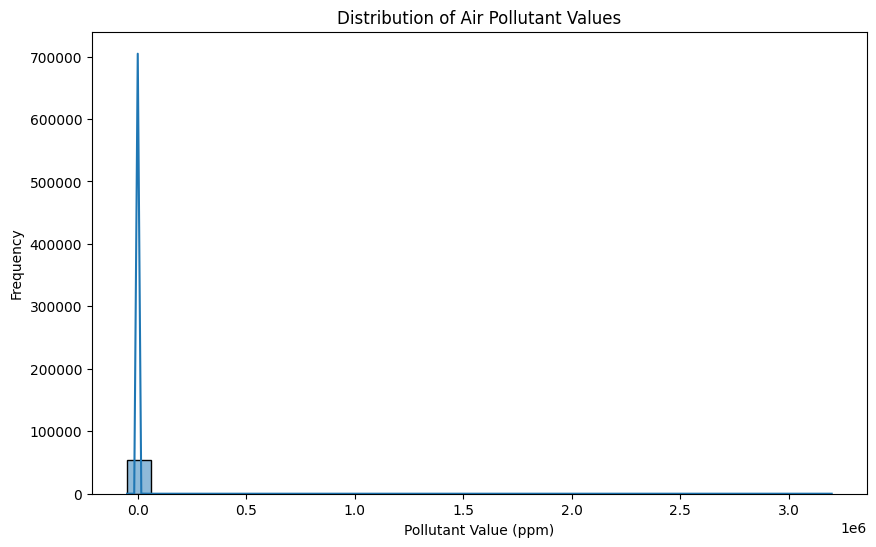

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], bins=30, kde=True)
plt.title('Distribution of Air Pollutant Values')
plt.xlabel('Pollutant Value (ppm)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Correlation heatmap for numerical features

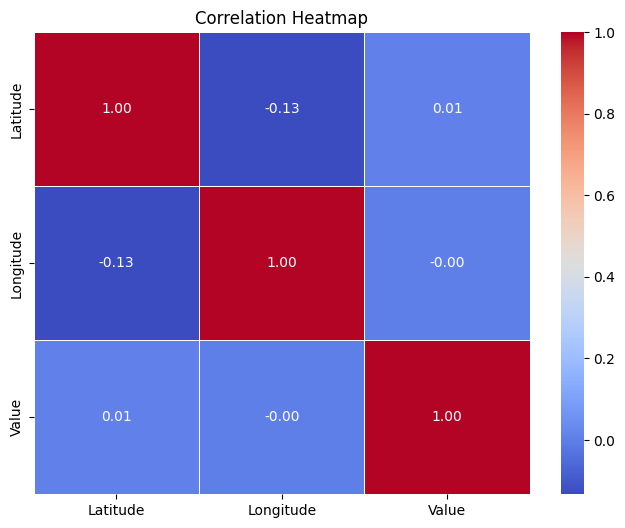

In [ ]:
corr = df[['Latitude', 'Longitude', 'Value']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Plotting the average pollution levels

In [ ]:
# Average pollutant levels per country

In [ ]:
avg_pollution_by_country = df.groupby('Country Label')['Value'].mean().sort_values(ascending=False)


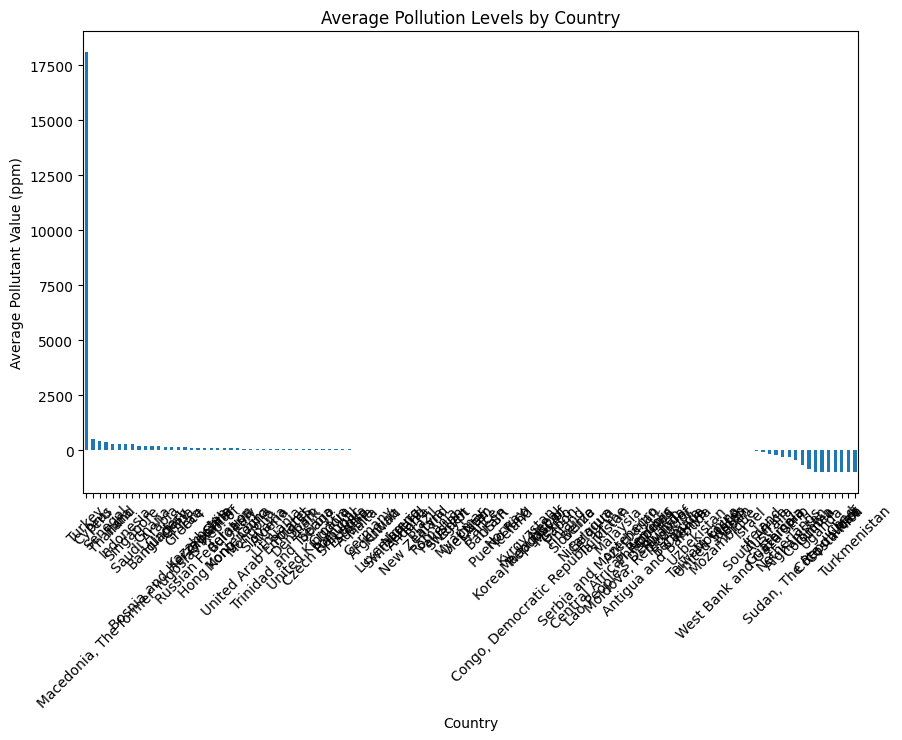

In [ ]:
plt.figure(figsize=(10, 6))
avg_pollution_by_country.plot(kind='bar')
plt.title('Average Pollution Levels by Country')
plt.xlabel('Country')
plt.ylabel('Average Pollutant Value (ppm)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Scatter plot for pollution levels by geographical coordinates

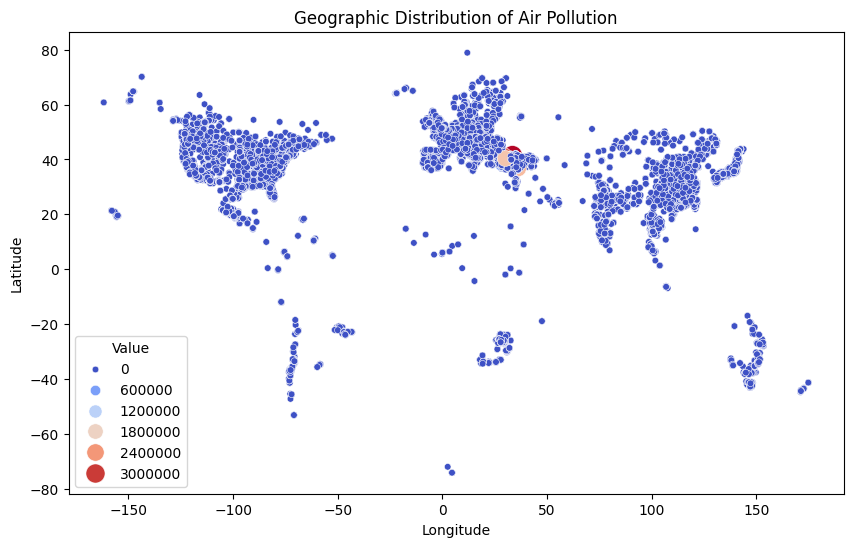

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Value', palette='coolwarm', data=df, size='Value', sizes=(20, 200))
plt.title('Geographic Distribution of Air Pollution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Create a map centered around Japan (example coordinates)

In [ ]:
m = folium.Map(location=[35.6895, 139.6917], zoom_start=5)

In [ ]:
# Add pollution data as markers

In [ ]:
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        popup=f"{row['Location']} - {row['Value']} ppm",
        color='blue' if row['Value'] < 0.01 else 'red',
        fill=True,
        fill_color='blue' if row['Value'] < 0.01 else 'red'
    ).add_to(m)

In [ ]:
# Save map (this will save the map to an HTML file)

In [ ]:
m.save('pollution_map.html')

# 🧹 **Data Cleaning and Preprocessing**
- **Handling Missing Values:**
  - Replace missing `City` and `Location` values with `"Unknown"`.
  - Fill missing `Country Label` with the mode value.
  - Drop rows with missing `Coordinates` for geographic accuracy.
- **Coordinate Processing:**
  - Split `Coordinates` into `Latitude` and `Longitude` columns for easier use.
  - Convert `Last Updated` to `datetime` format for time-based analysis.
- Verify the preprocessing changes using `df.head()` to ensure correctness.

In [ ]:
# Handle missing values without inplace to avoid the warning

In [ ]:
df['City'] = df['City'].fillna('Unknown')

In [ ]:
# Fill missing Location values with 'Unknown' or drop rows

In [ ]:
df['Location'] = df['Location'].fillna('Unknown')

In [ ]:
# Handle missing Country Label by filling with the most frequent value

In [ ]:
df['Country Label'] = df['Country Label'].fillna(df['Country Label'].mode()[0])


In [ ]:
# Drop rows with missing Coordinates (or could fill with default values)

In [ ]:
df = df.dropna(subset=['Coordinates'])

In [ ]:
# Convert 'Last Updated' to datetime format

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [ ]:
# Split the 'Coordinates' into 'Latitude' and 'Longitude' columns

In [ ]:
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(',', expand=True)


In [ ]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

In [ ]:
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [ ]:
# Verify the changes

In [ ]:
print("After handling missing values and preprocessing:")
print(df.head())

After handling missing values and preprocessing:
  Country Code     City           Location            Coordinates Pollutant  \
0           JP  Unknown  北九州市小倉北区大門一丁目６－４８  33.880833, 130.873056        NO   
1           JP  Unknown   北九州市若松区本町三丁目１３－１      33.898056, 130.81       NO2   
2           JP  Unknown   北九州市門司区大里原町１２－１２  33.895833, 130.935833       NOX   
3           JP  Unknown          千歳市若草４－１３     42.786944, 141.605       NO2   
4           JP  Unknown    千葉市稲毛区宮野木町９９６－９  35.653889, 140.097778       NOX   

      Source Name Unit  Value              Last Updated Country Label  \
0  japan-soramame  ppm  0.002 2024-03-10 13:30:00+05:30         Japan   
1  japan-soramame  ppm  0.005 2024-03-10 13:30:00+05:30         Japan   
2  japan-soramame  ppm  0.013 2024-03-10 13:30:00+05:30         Japan   
3  japan-soramame  ppm  0.004 2024-03-10 13:30:00+05:30         Japan   
4  japan-soramame  ppm  0.003 2024-03-10 13:30:00+05:30         Japan   

    Latitude   Longitude  
0  33.8808

# 🔧 **Feature Selection and Engineering**
- **Features:** Use `Pollutant`, `Latitude`, `Longitude`, and `Coordinates` as predictors.
- **Target Variable:** The pollutant concentration (`Value`).
- **Preprocessing:**
  - Standardize numerical features (`Latitude`, `Longitude`) for uniform scaling.
  - One-hot encode categorical features (`Pollutant`) to make them machine-readable.
- Use `ColumnTransformer` and `Pipeline` for efficient preprocessing integration.

In [ ]:
# Selecting features and target variable

In [ ]:
X = df[['Coordinates', 'Pollutant', 'Latitude', 'Longitude']]  # Predictor features


In [ ]:
y = df['Value']  # Target variable

In [ ]:
# Preprocessing steps

In [ ]:
# Split 'Coordinates' into Latitude and Longitude (if not already done)

In [ ]:
X['Latitude'] = df['Latitude']

In [ ]:
X['Longitude'] = df['Longitude']

In [ ]:
# Categorical and numerical columns

In [ ]:
categorical_cols = ['Pollutant']

In [ ]:
numerical_cols = ['Latitude', 'Longitude']

In [ ]:
# Preprocessing pipeline for categorical and numerical features

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [ ]:
# Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 🤖 **Model Building**
- **Linear Regression:** A simple, interpretable baseline model.
- **Neural Network:** Advanced model with hidden layers for complex patterns.
- **Pipeline Setup:**
  - Combine preprocessing and modeling into one pipeline for streamlined implementation.
- Split data into training and testing sets using an 80-20 ratio (`train_test_split`).

In [ ]:
# Modeling: Linear Regression and Neural Network

In [ ]:
# Linear Regression Pipeline

In [ ]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
# Neural Network Pipeline

In [ ]:
nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

In [ ]:
# Fitting and evaluation for Linear Regression

In [ ]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Latitude', 'Longitude']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pollutant'])])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred_lr = lr_pipeline.predict(X_test)

In [ ]:
# Neural Network Pipeline with fewer layers and reduced iterations

In [ ]:
nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(50,), max_iter=200, random_state=42))
])

In [ ]:
# Fitting and evaluation for Neural Network with updated settings

In [ ]:
nn_pipeline.fit(X_train, y_train)  # To run very fast

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Latitude', 'Longitude']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pollutant'])])),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(50,), random_state=42))])

In [ ]:
y_pred_nn = nn_pipeline.predict(X_test)

# 📈 **Model Evaluation**
- **Metrics Used:**
  - **RMSE (Root Mean Squared Error):** Indicates prediction accuracy (lower is better).
  - **R² Score:** Shows how well the model explains variance in the data (closer to 1 is better).
- Evaluate both models and compare results to determine the better approach.
- Save predicted results along with actual values to a CSV file (`pollution_predictions.csv`).

In [ ]:
# Evaluate the neural network model

In [ ]:
mse_nn = mean_squared_error(y_test, y_pred_nn)  # Mean Squared Error

In [ ]:
rmse_nn = np.sqrt(mse_nn)  # Root Mean Squared Error

In [ ]:
# Print RMSE and R-squared

In [ ]:
print("Neural Network RMSE:", rmse_nn)
print("Neural Network R2:", r2_score(y_test, y_pred_nn))

Neural Network RMSE: 15422.379472765031
Neural Network R2: 0.012643305180816355


In [ ]:
# Let's save the predicted results along with actual values to a DataFrame

In [ ]:
predictions_df = pd.DataFrame({
    'Actual': y_test,  # Actual target values
    'Predicted': y_pred_nn  # Predicted values from the model
})

In [ ]:
# Save the predictions to a CSV file

In [ ]:
predictions_df.to_csv('pollution_predictions.csv', index=False)

# 🌟 **Insights and Next Steps**
- **Insights:**
  - Visualization reveals geographic hotspots of pollution.
  - The neural network outperforms linear regression for complex patterns.
- **Next Steps:**
  - Improve model performance by experimenting with hyperparameters.
  - Explore temporal trends using `Last Updated` for time-series analysis.
  - Share the interactive pollution map for wider accessibility.